In [57]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from nltk.util import ngrams
import numpy as np

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [58]:
DF = pd.read_csv("C:/Users/giulia macis/Desktop/UBISOFT/badvideogames/youtube_comments_QCsooGAbTqg.csv")
DF

,URL,title,releaseDate,author,comment,publishedTimeText,replyCount,voteCount
0,https://www.youtube.com/watch?v=QCsooGAbTqg,Atomic Heart is 2023's First Major Disappointm...,2023-02-20T13:07:32Z,@underthemayo,Correction: They updated the game to allow dif...,2023-02-20T11:35:02Z,12,104
1,https://www.youtube.com/watch?v=QCsooGAbTqg,Atomic Heart is 2023's First Major Disappointm...,2023-02-20T13:07:32Z,@Poopyturdy,Game is so trash holy cow,2024-07-12T03:02:30Z,2,1
2,https://www.youtube.com/watch?v=QCsooGAbTqg,Atomic Heart is 2023's First Major Disappointm...,2023-02-20T13:07:32Z,@gabmirdev,LMAO MALUMA,2024-06-21T15:07:54Z,0,0
3,https://www.youtube.com/watch?v=QCsooGAbTqg,Atomic Heart is 2023's First Major Disappointm...,2023-02-20T13:07:32Z,@sebastiannunez9023,"Under the mayo knows maluma, never thought i'd...",2024-06-14T14:57:01Z,0,1
4,https://www.youtube.com/watch?v=QCsooGAbTqg,Atomic Heart is 2023's First Major Disappointm...,2023-02-20T13:07:32Z,@rik0904,24:15 they didn't,2024-06-11T21:08:43Z,0,0
...,...,...,...,...,...,...,...,...
596,https://www.youtube.com/watch?v=QCsooGAbTqg,Atomic Heart is 2023's First Major Disappointm...,2023-02-20T13:07:32Z,@sneakyking,More like atomic fart...\nI'll leave,2023-02-20T13:09:59Z,0,6
597,https://www.youtube.com/watch?v=QCsooGAbTqg,Atomic Heart is 2023's First Major Disappointm...,2023-02-20T13:07:32Z,@HelloKittySGTC,Not going to watch until i play the game which...,2023-02-20T13:09:48Z,2,18
598,https://www.youtube.com/watch?v=QCsooGAbTqg,Atomic Heart is 2023's First Major Disappointm...,2023-02-20T13:07:32Z,@prod.yvmu1,pain,2023-02-20T13:08:50Z,0,0
599,https://www.youtube.com/watch?v=QCsooGAbTqg,Atomic Heart is 2023's First Major Disappointm...,2023-02-20T13:07:32Z,@explodingheart2824,Oh no I was really hoping this wouldn't happen,2023-02-20T13:08:29Z,0,10


In [59]:
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(['harry', 'potter', 'hogwarts','legacy',
    'like', 'take', 'studio', 'got', 'people', 'get', 
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score','video','review'
])

new_stopwords = set(stopwords.words('english'))
new_stopwords.update([
     'like', 'take', 'studio', 'got', 'people', 'get',
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','video','game','give',
    'lol','gon','ive','fuck','fucking','lmno','want','better','one','first',"atomic",
    "heart","going","look","buy","guy","pretty","btw","instead","could","let","shit",
    "say","another","year","lot","fov","thing",'would','see','played','lmao',"review",
    "stuff","every","title"
])
lmtzr = WordNetLemmatizer()

In [60]:
# Define reusable functions

def preprocess_text(text):
    """Preprocess text by lowercasing, removing punctuation, tokenizing, and filtering stopwords."""
    if not isinstance(text, str):
        return ""
    tokens = word_tokenize(text.lower().translate(str.maketrans('', '', string.punctuation)))
    tokens = [lmtzr.lemmatize(word) for word in tokens if word not in custom_stopwords and len(word) >= 3]
    return ' '.join(tokens)

def get_sentiment(text):
    """Classify sentiment of text as positive, negative, or neutral."""
    score = analyzer.polarity_scores(text)
    negative_words = ["suck", "sucks", "done", "worst", "hate", "disappointed", "disgusted","shit","dog shit", ]
    if any(word in text.lower() for word in negative_words):
        return 'negative'
    elif score['compound'] >= 0.01:
        return 'positive'
    elif score['compound'] <= -0.01:
        return 'negative'
    else:
        return 'neutral'

def text_processing(texts):
    """Further clean and tokenize text for topic modeling."""
    texts = [re.sub("[^a-zA-Z]+", " ", str(text)) for text in texts]
    texts = [[word for word in text.lower().split()] for text in texts]
    texts = [[lmtzr.lemmatize(word) for word in text if word not in new_stopwords and len(word) >= 3] for text in texts]
    return texts

def bigram_analysis(comments, top_n=30):
    """Generate bigrams from tokenized comments and plot the frequency distribution."""
    all_tokens = [word_tokenize(comment) for comment in comments]
    all_ngrams = [ngram for tokens in all_tokens for ngram in ngrams(tokens, 2)]
    freq_dist_ngrams = FreqDist(all_ngrams)
    
    # Convert to DataFrame and sort
    df_ngrams = pd.DataFrame(list(freq_dist_ngrams.items()), columns=['n-gram', 'frequency'])
    df_ngrams = df_ngrams.sort_values(by='frequency', ascending=False)
    
    # Plot top n bigrams
    plt.figure(figsize=(12, 6))
    plt.bar(
        df_ngrams['n-gram'][:top_n].apply(lambda x: ' '.join(x)),  
        df_ngrams['frequency'][:top_n]
    )
    plt.title(f'Top {top_n} Bigram Frequency Distribution')
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()
    
    return df_ngrams

In [61]:
# Convert to datetime and extract only the date part
DF['releaseDate'] = pd.to_datetime(DF['releaseDate'].astype(str).str.replace('Z', '')).dt.date
DF['publishedTimeText'] = pd.to_datetime(DF['publishedTimeText'].astype(str).str.replace('Z', '')).dt.date

# Define the one-week period after the release date
release_date = DF['releaseDate'][0]
one_week_after_release = release_date + pd.DateOffset(weeks=1)
one_week_after_release = one_week_after_release.date()  # Convert to date format

# Filter for comments within the first week after the release date
df = DF[(DF['publishedTimeText'] >= release_date) & (DF['publishedTimeText'] <= one_week_after_release)]

# Select relevant columns and preprocess comments
df = df[['publishedTimeText', 'comment']]
df['processed_comments'] = df['comment'].apply(preprocess_text)

# Display the filtered DataFrame
df


,publishedTimeText,comment,processed_comments
0,2023-02-20,Correction: They updated the game to allow dif...,correction updated game allow difficulty chang...
97,2023-02-27,"I overall enjoyed the game, but I can definetl...",overall enjoyed game definetly agree criticism...
98,2023-02-27,Damn this game was so fucking fun. I loved it ...,damn game fucking fun loved turn sensitivity b...
99,2023-02-27,Atomic Heart is a subpar game. Most of today's...,atomic heart subpar game today game developer ...
100,2023-02-27,Great vid. I think you summed up this game per...,great vid summed game perfectly gon force suff...
...,...,...,...
596,2023-02-20,More like atomic fart...\nI'll leave,atomic fart ill leave
597,2023-02-20,Not going to watch until i play the game which...,going watch game come later today ive looking ...
598,2023-02-20,pain,pain
599,2023-02-20,Oh no I was really hoping this wouldn't happen,hoping wouldnt happen


In [62]:
# Randomly sample 500 rows with a fixed random_state for reproducibility
df = df.sample(n=500, random_state=0).reset_index(drop=True)  # Use any integer as the random_state

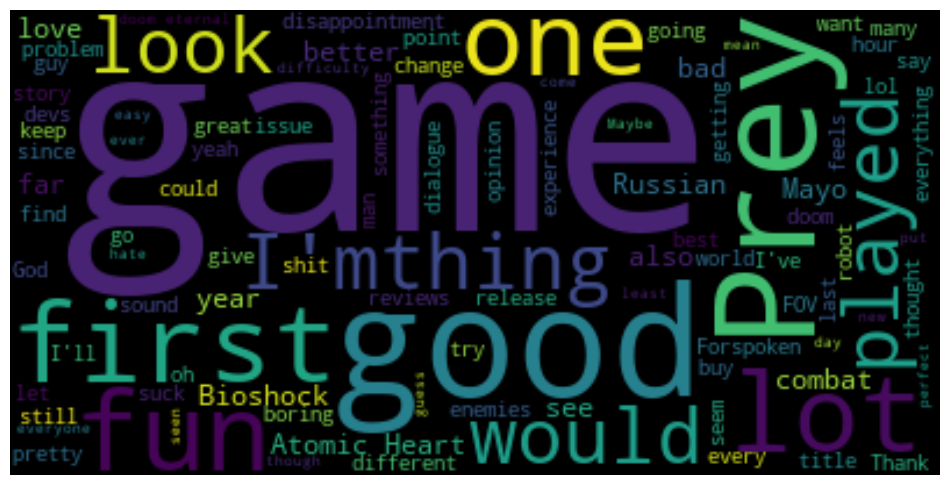

In [63]:
# WordCloud Visualization
word_cloud_text = ' '.join(df['comment'].dropna())
wordcloud = WordCloud(max_words=100, stopwords=custom_stopwords, random_state=1).generate(word_cloud_text)
plt.figure(figsize=(12, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [64]:
# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
df['sentiment'] = df['processed_comments'].apply(get_sentiment)
most_common_sentiment = df['sentiment'].value_counts().idxmax()
print(f'The video has mostly {most_common_sentiment} comments.')
df



The video has mostly negative comments.


,publishedTimeText,comment,processed_comments,sentiment
0,2023-02-23,There's no 6 hour zex scene,there hour zex scene,neutral
1,2023-02-23,Lol dude wants to move as fast as the killer r...,lol dude want move fast killer robot,negative
2,2023-02-20,Idiots who love USSR started war year ago. Now...,idiot love ussr started war year ago want game...,positive
3,2023-02-20,"Game comes out, mayo hates it. Ahhh the fresh ...",game come mayo hate ahhh fresh smell predictab...,negative
4,2023-02-20,!!! WARNING THE VIDEO CONTAINS FINAL BOSS SPOI...,warning contains final bos spoiler absolute am...,negative
...,...,...,...,...
495,2023-02-21,I kinda think the opposite of this review. Alt...,opposite although world game thought story fel...,positive
496,2023-02-27,Actually enjoyed the game until the plyusch bo...,enjoyed game plyusch bos refused spawn blocked...,neutral
497,2023-02-20,"I hear this A LOT for modern games: ""It gets g...",hear lot modern game get good 20hour mark both...,positive
498,2023-02-21,Btw you can change the difficulty in game - it...,btw change difficulty game option,negative


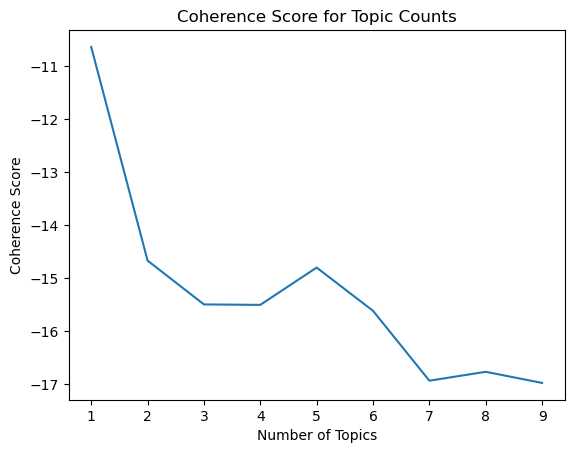

In [65]:
# Topic Modeling
data = text_processing(df['processed_comments'].values.tolist())
dictionary = Dictionary(data)
corpus = [dictionary.doc2bow(text) for text in data]
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Coherence Analysis for Topic Modeling
np.random.seed(1)
k_range = range(1, 10)
scores = []
for k in k_range:
    lda_model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=k, passes=20)
    cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    scores.append(cm.get_coherence())

plt.figure()
plt.plot(k_range, scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score for Topic Counts")
plt.show()


In [66]:
# Final LDA Model with Optimal Number of Topics
optimal_k = 2
model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=optimal_k, passes=20)
print(model.show_topics())

[(0, '0.006*"prey" + 0.004*"disappointment" + 0.003*"good" + 0.003*"mayo" + 0.002*"major" + 0.002*"combat" + 0.002*"wasnt" + 0.002*"thanks" + 0.002*"ill" + 0.002*"difficulty"'), (1, '0.004*"forspoken" + 0.004*"russian" + 0.003*"doom" + 0.003*"love" + 0.003*"eternal" + 0.003*"fun" + 0.002*"bioshock" + 0.002*"good" + 0.002*"great" + 0.002*"bad"')]


Choosing 2 topics maximizes coherence, capturing the main themes without over-segmenting the content.

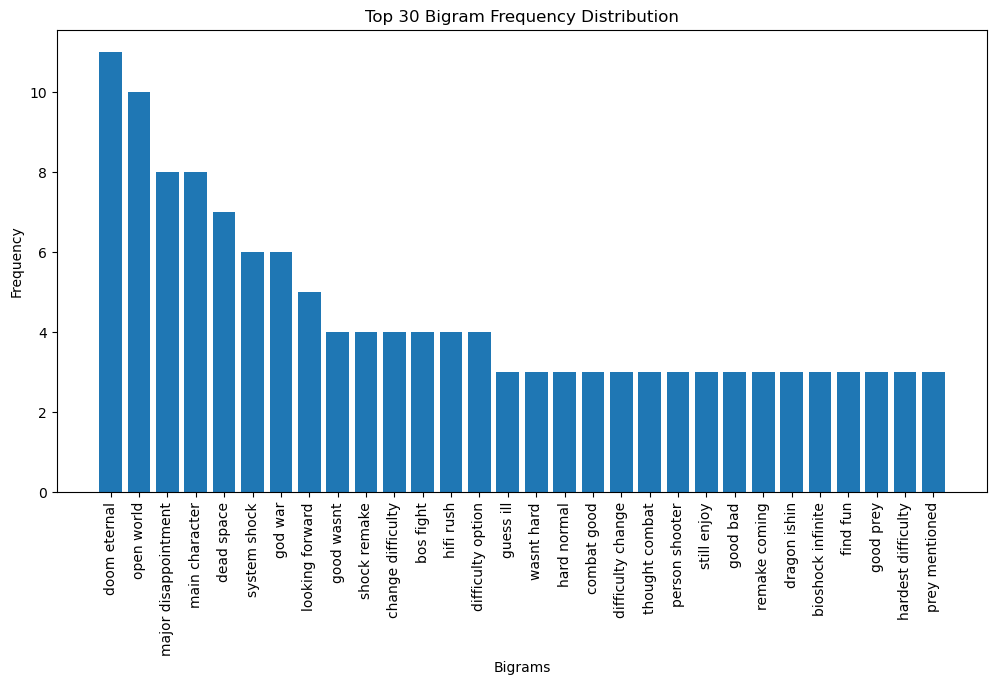

In [68]:
data_as_strings = [' '.join(tokens) for tokens in data]
df_ngrams = bigram_analysis(data_as_strings)

In [69]:
#Load the existing df_topics CSV file
#title=DF['title'].unique()
#file_path = r'C:/Users/giulia macis/Desktop/UBISOFT/df_bad_topics.csv'
#df_bad_topics = pd.read_csv(file_path)
#Append the new row to the DataFrame
#new_row = pd.DataFrame({'title': title, 'num_topics': optimal_k})
#df_bad_topics = pd.concat([df_bad_topics, new_row], ignore_index=True)
# Save the updated DataFrame back to the CSV file
#df_bad_topics.to_csv(file_path, index=False)
#df_bad_topics

,title,num_topics
0,The Last of Us Part II - Angry Review,1
1,Fallout 76 Angry Review,1
2,Is Kingdom Come Deliverance Racist?,1
3,"So far, I do not recommend: Battlefield 2042 (...",4
4,Call of Duty: Modern Warfare 3 Single-Player C...,1
5,Suicide Squad: Kill the Justice League Review,3
6,Atomic Heart is 2023's First Major Disappointm...,2
